In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [74]:
import os

root_dir = "C:\\Users\\rkkab\\Downloads\\attendence_data\\train"
for class_name in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_name)
    if os.path.isdir(class_path):
        for fname in os.listdir(class_path):
            print(fname)  # See what files are found


d.jpg
des1.jpg
des25.jpg
desiga.jpg
file (2).jpg
kab12.jpg
kabi14.jpg
kabi2.jpg
kabi4.jpg
kom1.jpg
kom2.jpg
kom3.jpg
kom4.jpg
kom5.jpg
image.jpg
pan image.jpg
raj.jpg


In [75]:
IMG_SIZE=224


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\rkkab\\Downloads\\attendence_data\\train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32
)
print(train_ds.class_names)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\rkkab\\Downloads\\attendence_data\\train",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    
)

print(val_ds.class_names)
AUTOTUNE = tf.data.AUTOTUNE
train_d = train_ds.prefetch(buffer_size=AUTOTUNE)
val_d = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 17 files belonging to 4 classes.


Using 14 files for training.
['desika', 'kabilan', 'komathi', 'rajendiran']
Found 17 files belonging to 4 classes.
Using 3 files for validation.
['desika', 'kabilan', 'komathi', 'rajendiran']


In [ ]:
def show_images(dataset, n=5):
    plt.figure(figsize=(15, 5))
    for images in dataset.take(1):  
        for i in range(n):
            plt.subplot(1, n, i + 1)
            img = images[i].numpy()
            plt.imshow(img) 
            plt.axis("off")
    plt.tight_layout()
    plt.show()

In [77]:

augumentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomContrast(0.5)
])

In [78]:
def prepare(ds, shuffle=False, augment=False):
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y),
                num_parallel_calls=tf.data.AUTOTUNE)
    if augment:
        ds = ds.map(lambda x, y: (augumentation_layer(x, training=True), y),
                    num_parallel_calls=tf.data.AUTOTUNE)
    return ds.prefetch(tf.data.AUTOTUNE)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


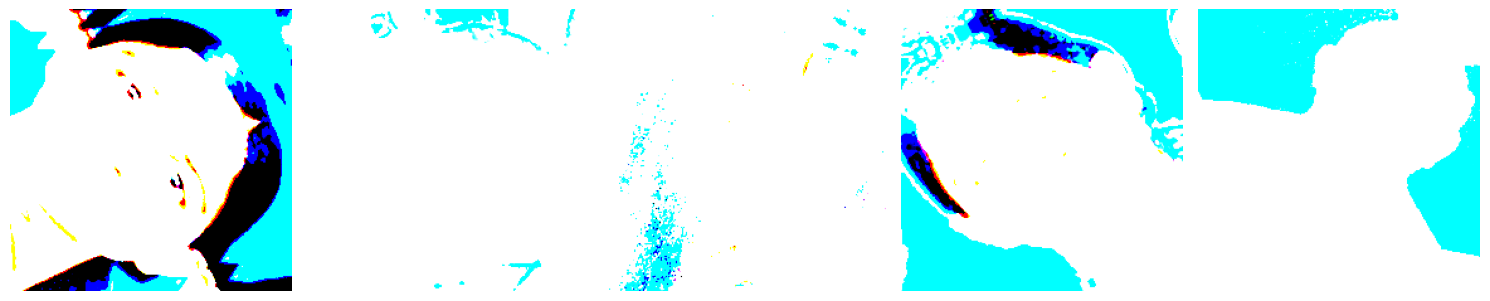

In [79]:
augumented_images = train_ds.take(10).map(
    lambda x,y : augumentation_layer(x)
)
show_images(augumented_images)

In [80]:
processed_images = prepare(train_d,shuffle=False, augment=True)
processed_images
prepared_val_ds = prepare(val_d)

In [ ]:
class_names = train_ds.class_names
num_classes=len(class_names)
from tensorflow.keras import layers, models, regularizers

IMG_SIZE = 224

from tensorflow.keras import layers, models, regularizers

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.SeparableConv2D(512, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-3))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.6)(x)

x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-3))(x)
x = layers.Dropout(0.6)(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)





In [82]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 28, 28, 512)    │       133,888 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,448,132 (5.52 MB)

 Trainable params: 1,446,084 (5.52 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [83]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\rkkab\\Downloads\\attendence_data\\val",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    shuffle=False  # typically no shuffle for test data
)

ur="C:\\Users\\rkkab\\Downloads\\attendence_data\\test"
for clsname in os.listdir(ur):
    
    file=os.path.join(ur,clsname)
    if os.path.isdir(file):
        for files in os.listdir(file):
            print(files) 


Found 2 files belonging to 2 classes.
kab12.jpg


In [84]:
def prepare_test(images):
    images = images.map(lambda x, y: (tf.image.resize(x, [IMG_SIZE, IMG_SIZE]) / 255.0, y))
    return images.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),  # smaller LR
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
prepared_test_ds = prepare(test_ds)
from tensorflow.keras.callbacks import EarlyStopping

#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

history = model.fit(
    processed_images,
    validation_data=val_d,
    epochs=100,callbacks=[checkpoint])

Epoch 1/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.3571 - loss: 2.8546 - val_accuracy: 0.0000e+00 - val_loss: 1.8650
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4286 - loss: 2.2600 - val_accuracy: 0.0000e+00 - val_loss: 1.8723
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4286 - loss: 1.7446 - val_accuracy: 0.0000e+00 - val_loss: 1.8718
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5714 - loss: 1.3676 - val_accuracy: 0.3333 - val_loss: 1.8691
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 2.2104 - val_accuracy: 0.3333 - val_loss: 1.8673
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5714 - loss: 1.6184 - val_accuracy: 0.3333 - val_loss: 1.8624
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 1.4007 - val_accuracy: 0.3333 - val_loss: 1.8615
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5714 - loss: 1.4667 - val_accuracy: 0.3333 - val_loss: 1.8603
Epoch 9/

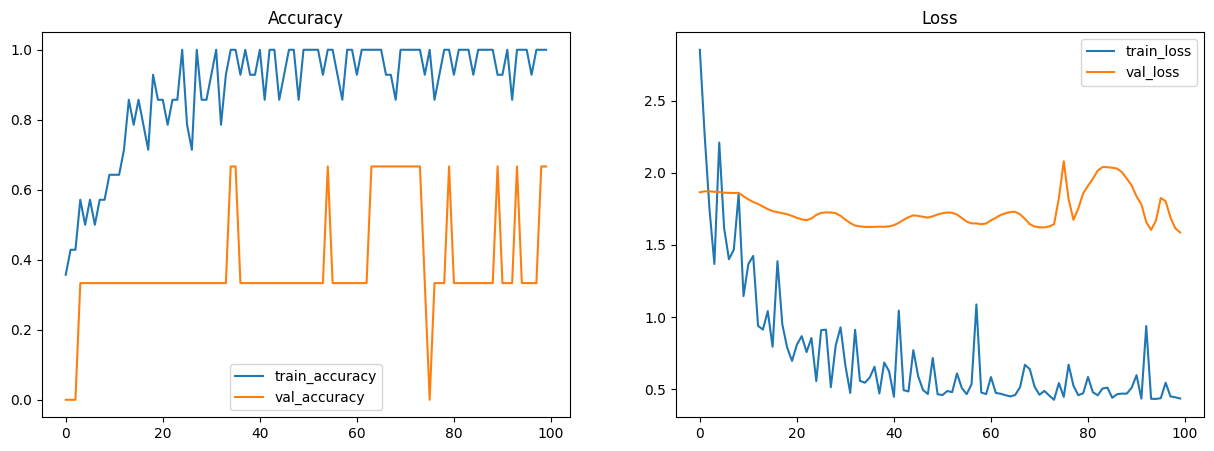

In [88]:
history = history.history
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history["accuracy"],label="train_accuracy")
plt.plot(history["val_accuracy"],label="val_accuracy")
plt.legend()

plt.subplot(122)
plt.title("Loss")
plt.plot(history["loss"],label="train_loss")
plt.plot(history["val_loss"],label="val_loss")
plt.legend()

In [ ]:
def p_test(image_path):
    # Read and decode the image
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)  
    # Resize and normalize
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = img / 255.0
    # Add batch dimension: (1, IMG_SIZE, IMG_SIZE, 3)
    img = tf.expand_dims(img, axis=0)
    return img


In [ ]:
class_names = train_ds.class_names
import json

with open("class_names.json", "w") as f:
    json.dump(train_ds.class_names, f)
v = "C:\\users\\rkkab\\Downloads\\attendence_data\\train\\kabilan\\kabi1.jpg"   
preds = model.predict(test_ds)
predicted_class_index = np.argmax(preds, axis=1)[0]
predicted_class_name = class_names[predicted_class_index]

print("Predicted class:", predicted_class_name)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
Predicted class: kabilan
